<a href="https://colab.research.google.com/github/Sam777726/hello-world/blob/master/Data_Visualisation_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Coursera Data Visualization with Python Assignment 2**

In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving WHO-COVID-19-global-data.csv to WHO-COVID-19-global-data.csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['WHO-COVID-19-global-data.csv']))
df2.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
97876,14-02-21,ZW,Zimbabwe,AFRO,59,35104,5,1398
97877,15-02-21,ZW,Zimbabwe,AFRO,68,35172,2,1400
97878,16-02-21,ZW,Zimbabwe,AFRO,50,35222,10,1410
97879,17-02-21,ZW,Zimbabwe,AFRO,93,35315,4,1414
97880,18-02-21,ZW,Zimbabwe,AFRO,108,35423,4,1418


*Setting the date in recognized format*

In [4]:
df2["Date_reported"] = pd.to_datetime(df2["Date_reported"],dayfirst = True)
df2.tail()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
97876,2021-02-14,ZW,Zimbabwe,AFRO,59,35104,5,1398
97877,2021-02-15,ZW,Zimbabwe,AFRO,68,35172,2,1400
97878,2021-02-16,ZW,Zimbabwe,AFRO,50,35222,10,1410
97879,2021-02-17,ZW,Zimbabwe,AFRO,93,35315,4,1414
97880,2021-02-18,ZW,Zimbabwe,AFRO,108,35423,4,1418


**Q1. 1.	Display line chart for Cumulative_cases for country like Sweden,Thailand and Iraq day wise**

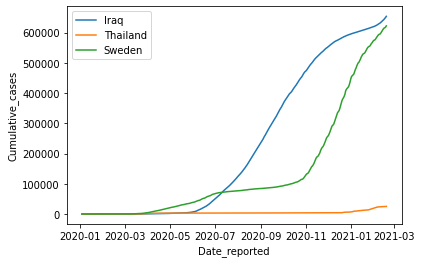

In [6]:
import matplotlib.pyplot as plt

thai_df=df2.loc[df2['Country']=='Thailand'] 
iraq_df=df2.loc[df2['Country']=='Iraq'] 
swed_df=df2.loc[df2['Country']=='Sweden'] 

plt.plot("Date_reported","Cumulative_cases",data=iraq_df,label='Iraq')
plt.plot("Date_reported","Cumulative_cases",data=thai_df,label="Thailand")
plt.plot("Date_reported","Cumulative_cases",data=swed_df,label="Sweden")
plt.xlabel('Date_reported')
plt.ylabel('Cumulative_cases')
plt.legend()

plt.show()

**Q2.Design pie chart visualization of new_death cases in last six months for countries like Jordan, India,Zimbabwe and Kenya.**

In [7]:
options = ['India', 'Jordan', 'Kenya', 'Zimbabwe']

df3=df2[(df2['Date_reported'] > '2020-09-17') 
          & df2['Country'].isin(options)]
df3.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
39907,2020-09-18,IN,India,SEARO,96424,5214677,1174,84372
39908,2020-09-19,IN,India,SEARO,93337,5308014,1247,85619
39909,2020-09-20,IN,India,SEARO,92605,5400619,1133,86752
39910,2020-09-21,IN,India,SEARO,86961,5487580,1130,87882
39911,2020-09-22,IN,India,SEARO,75083,5562663,1053,88935


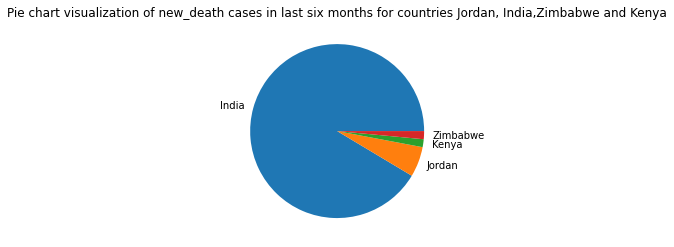

In [8]:
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
sums = df3.groupby(df3["Country"])["New_deaths"].sum()
axis('equal')
pie(sums, labels=sums.index);
plt.title('Pie chart visualization of new_death cases in last six months for countries Jordan, India,Zimbabwe and Kenya')
show()

**Q3. Design bar chart visualization for first six months for countries like Algeria,Spain,Israel and Bangladesh**

In [10]:
options1 = ['Algeria', 'Spain', 'Israel', 'Bangladesh']

df4=df2[(df2['Date_reported'] < '2020-06-04') 
          & df2['Country'].isin(options1)]
df4.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
83574,2020-05-30,ES,Spain,EURO,775,246423,41,29040
83575,2020-05-31,ES,Spain,EURO,836,247259,43,29083
83576,2020-06-01,ES,Spain,EURO,379,247638,43,29126
83577,2020-06-02,ES,Spain,EURO,193,247831,39,29165
83578,2020-06-03,ES,Spain,EURO,364,248195,34,29199


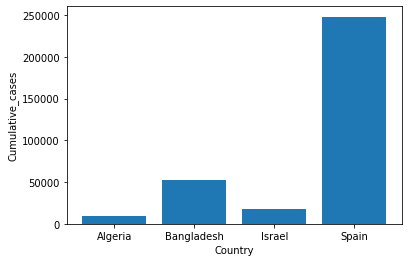

In [26]:

options1 = ['Algeria', 'Spain', 'Israel', 'Bangladesh']

df4=df2[(df2['Date_reported'] < '2020-06-04') 
          & df2['Country'].isin(options1)]

df4=df4.loc[df4['Date_reported']=='2020-06-03']
plt.bar(df4['Country'],df4['Cumulative_cases'])
plt.xlabel('Country')
plt.ylabel('Cumulative_cases')
plt.show()


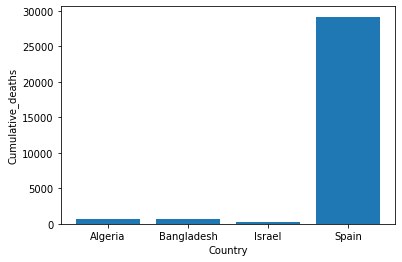

In [27]:
plt.bar(df4['Country'],df4['Cumulative_deaths'])
plt.xlabel('Country')
plt.ylabel('Cumulative_deaths')
plt.show()


**Q4. Display numbers of new cases of covid-19 using Geo map South Africa, Sweden, England, Spain, India, Algeria**

In [66]:
options2 = ['Sweden', 'Spain', 'The United Kingdom', 'India', 'Algeria', 'South Africa']

df5=df2[(df2['Date_reported']=='2021-02-18')& df2['Country'].isin(options2) ]
df5

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1238,2021-02-18,DZ,Algeria,AFRO,178,111247,2,2947
40060,2021-02-18,IN,India,SEARO,12881,10950201,101,156014
83012,2021-02-18,ZA,South Africa,AFRO,2320,1496439,165,48478
83838,2021-02-18,ES,Spain,EURO,4691,3107172,43,66316
85490,2021-02-18,SE,Sweden,EURO,4245,622102,0,12569
87555,2021-02-18,GB,The United Kingdom,EURO,12717,4071189,738,118933


In [ ]:
pip install country_converter --upgrade

Requirement already up-to-date: country_converter in /usr/local/lib/python3.7/dist-packages (0.7.3)


In [67]:
import plotly.express as px
import country_converter as coco
cc = coco.CountryConverter()
df6=df5
df6['Country_code'] = coco.convert(names=df6['Country_code'], to='ISO3')
fig = px.choropleth(df5, locations="Country_code",
                    color="New_cases", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

